In [54]:
import cv2
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.animation as animation
from matplotlib.pylab import cm

### Defining functions for calculating optical flow for each frame

In [7]:
def OF(prev_img, next_img, win_sz=5):
    I_x = np.gradient(prev_img, axis=1)
    I_y = np.gradient(prev_img, axis=0)
    I_t = next_img - prev_img
    
    motion_direction = np.zeros((prev_img.shape[0], prev_img.shape[1], 2))
    
    win = win_sz // 2

    ##########
    
    ## For window calculating the gradient(direction of motion)
    for y in range(win, prev_img.shape[0] - win):
        for x in range(win, prev_img.shape[1] - win):
            Ix_win = I_x[y - win:y + win + 1, x - win:x + win + 1].flatten()
            Iy_win = I_y[y - win:y + win + 1, x - win:x + win + 1].flatten()
            It_win = I_t[y - win:y + win + 1, x - win:x + win + 1].flatten()

            ## Solving for Au = B
            A = np.vstack((Ix_win, Iy_win)).T
            B = -It_win.reshape((-1, 1))

            ## Generating the u, v from taking sudo-Inverse (A.T A)^-1 when the rank is greater or equals to 2
            if np.linalg.matrix_rank(A) >= 2:
                dir_at_xy = np.linalg.lstsq(A, B, rcond=None)[0]
                motion_direction[y, x] = dir_at_xy.flatten()
    
    return motion_direction

### Testing and Visualizing optical flow

#### Importing Test video from UCF101
https://www.crcv.ucf.edu/THUMOS14/UCF101/UCF101/v_Bowling_g25_c01.avi

In [12]:
vidcap = cv2.VideoCapture('v_Bowling_g25_c01.avi')
success,f = vidcap.read()
l=[]
l.append(f)
cnt=1
while success:
    success,f = vidcap.read()
    l.append(f)
    if not success:
        break
    cnt += 1

#### Storing all optical flow magnitude values of each frames in a list

In [8]:
ll=[]
for i in range(cnt-1):
    of = OF(l[i], l[i+1])
    mag = np.sqrt(np.sum(of**2, axis=2))
    ll.append(mag)

TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'

In [58]:
# fig = plt.figure()

# lines = plt.plot([])
# line = lines[0]

# def animate(frame):
#     print(frame)
#     of = OF(l[frame], l[frame+1])
#     mag = np.sqrt(np.sum(of**2, axis=2))
#     print(mag.shape)
#     line.set_data(mag)    

# anim = FuncAnimation(fig, animate, frames = cnt-1, interval = 30)
# vid = anim.to_html5_video()
# html = display.HTML(vid)
# display.display(html)
# plt.close()

In [30]:
def colorize(img, colormap):
    colorized = colormap(img)
    cv2.imwrite("img.jpg", colorized*255)

colorize(ll[0], cm.jet)
im = cv2.imread('img.jpg')

MovieWriter ffmpeg unavailable; using Pillow instead.


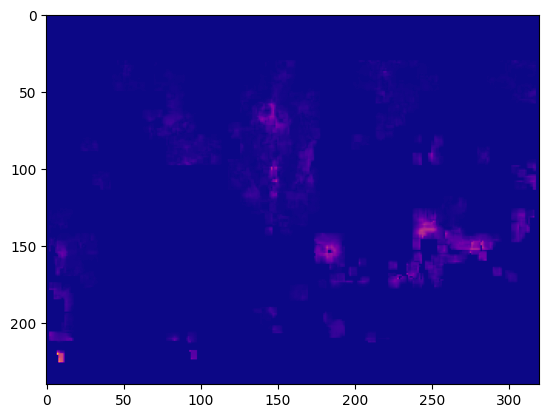

In [59]:
frames = [] # for storing the generated images
fig = plt.figure()
for i in range(len(ll)):
    frames.append([plt.imshow(ll[i], cmap='plasma',animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True, repeat_delay=1000)
ani.save('of_visualization.gif')

#### Visualizing the Flow in GIF format

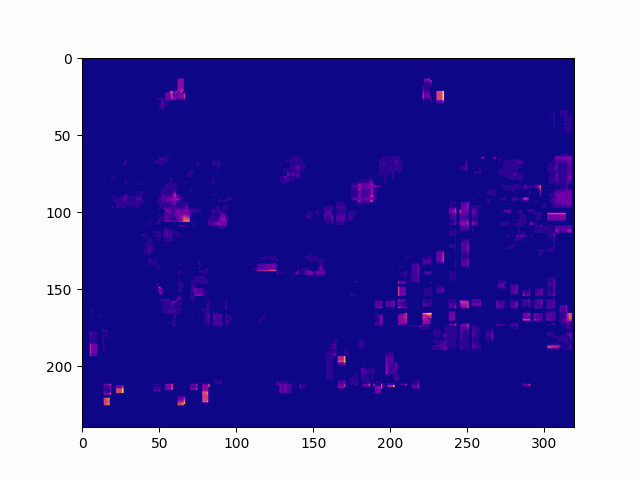

In [60]:
display.Image(data=open("of_visualization.gif",'rb').read(), format='png')